In [2]:
import pandas as pd
import numpy as np

In [5]:
#set seed for reproducibility
np.random.seed(10)

In [11]:
#Create range of dates
dates = pd.date_range(start='2025-01-01',end='2025-12-31',freq='D')
n = len(dates)
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
#Generate sample data
df = pd.DataFrame({
'date' : dates,
'sales' : np.random.randint(100,1000,size=n),
'product' : np.random.choice(['A','B','C','D'],size=n),
'cust_id' : np.random.randint(1,500,size=n),
'cost' : np.random.uniform(100,200,size=n)
})
df.head()

(365, 5)

In [24]:
#save the dataset as csv
df.to_csv("sample_business_data",index=False)
print(f"file saved")

file saved


In [25]:
#IDNTIFY TRENDS IN A DATSET USING PANDAS

In [ ]:
filepath = r'~/Users/sanjaym  /MY DESK/01_TECHNICAL/MY_GITHUB/Machine_Learning_Projects/1. Libraries'

In [29]:
df = pd.read_csv('sample_business_data')
df.head()

,date,sales,product,cust_id,cost
0,2025-01-01,859,C,4,166.916021
1,2025-01-02,353,C,98,121.752442
2,2025-01-03,760,C,450,190.103605
3,2025-01-04,995,A,365,182.104464
4,2025-01-05,396,C,483,147.169050


In [32]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     365 non-null    datetime64[ns]
 1   sales    365 non-null    int64         
 2   product  365 non-null    object        
 3   cust_id  365 non-null    int64         
 4   cost     365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 14.4+ KB


In [33]:
df.set_index('date',inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2025-01-01 to 2025-12-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sales    365 non-null    int64  
 1   product  365 non-null    object 
 2   cust_id  365 non-null    int64  
 3   cost     365 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 14.3+ KB


In [ ]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [48]:
monthly_trend = df['sales'].resample('ME').mean()
monthly_trend.tail()


date
2025-08-31    504.838710
2025-09-30    567.000000
2025-10-31    496.806452
2025-11-30    472.266667
2025-12-31    444.709677
Freq: ME, Name: sales, dtype: float64

In [52]:
#2. IDENTIFY CORRELATIONS
#select only numeric columns
numeric_df = df.select_dtypes(include='number')
numeric_df.head()

,sales,cust_id,cost
date,,,
2025-01-01,859,4,166.916021
2025-01-02,353,98,121.752442
2025-01-03,760,450,190.103605
2025-01-04,995,365,182.104464
2025-01-05,396,483,147.169050


In [55]:
corr_matrix = numeric_df.corr()
print(corr_matrix)

            sales   cust_id      cost
sales    1.000000  0.001922  0.173962
cust_id  0.001922  1.000000 -0.011496
cost     0.173962 -0.011496  1.000000


In [63]:
#3. Pandas data visualization
import matplotlib.pyplot as plt
monthly_sales = df['sales'].resample('M').sum()
monthly_sales


/var/folders/qm/zvkzkmf53w79ngd_d28v51th0000gn/T/ipykernel_12162/3495937053.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['sales'].resample('M').sum()


date
2025-01-31    15791
2025-02-28    13271
2025-03-31    15750
2025-04-30    16281
2025-05-31    17003
2025-06-30    17692
2025-07-31    16762
2025-08-31    15650
2025-09-30    17010
2025-10-31    15401
2025-11-30    14168
2025-12-31    13786
Freq: ME, Name: sales, dtype: int64

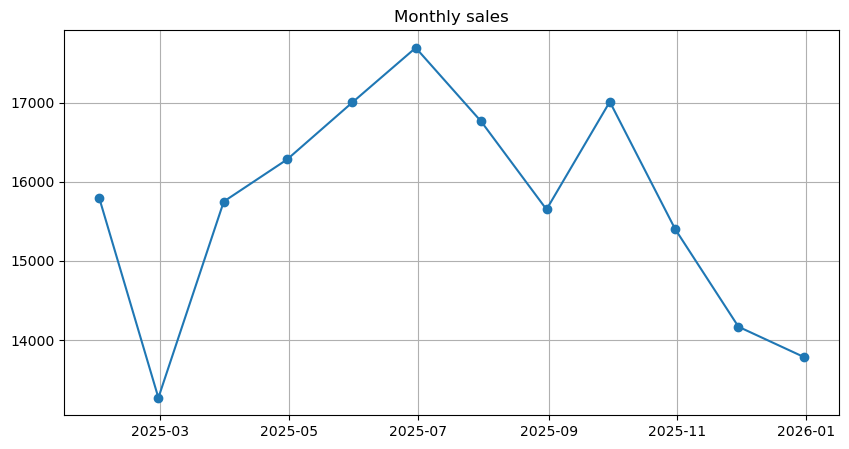

In [67]:

plt.figure(figsize=(10,5))
plt.plot(monthly_sales,marker='o')
plt.title('Monthly sales')
plt.grid(True)
plt.show()

In [77]:
df.head()
avg_sales_by_product = df.groupby('product')['sales'].mean().sort_values(ascending=False)
print(avg_sales_by_product)

product
D    531.233333
A    523.666667
B    515.865854
C    494.934066
Name: sales, dtype: float64


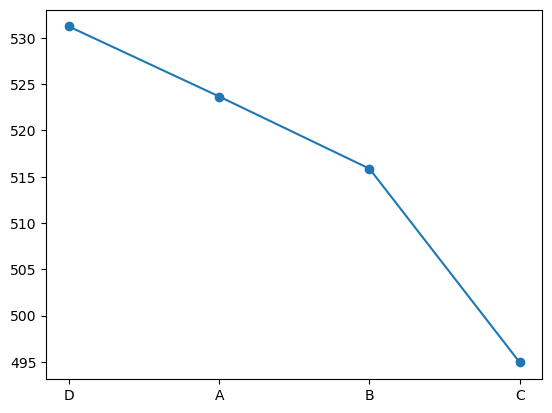

In [80]:
plt.plot(avg_sales_by_product,marker='o')
plt.show()

In [86]:
pre_campagin = df[df.index < '2025-06-01']['sales'].mean()
post_campgain = df[df.index >= '2025-06-01']['sales'].mean()
print(pre_campagin)
print(post_campgain)

517.1920529801324
516.2102803738318


In [90]:
print(f'change in the avg sales : {post_campgain - pre_campagin}')

change in the avg sales : -0.9817726063006376


In [92]:
df.head()


,sales,product,cust_id,cost
date,,,,
2025-01-01,859,C,4,166.916021
2025-01-02,353,C,98,121.752442
2025-01-03,760,C,450,190.103605
2025-01-04,995,A,365,182.104464
2025-01-05,396,C,483,147.169050


In [95]:
freq = df.groupby('cust_id').size().sort_values(ascending=False)
freq

cust_id
118    3
228    3
124    3
100    3
139    3
      ..
230    1
231    1
239    1
244    1
498    1
Length: 262, dtype: int64

In [98]:
produt_sales = df.groupby('product')['sales'].sum().sort_values(ascending=True)
produt_sales

product
B    42301
C    45039
D    47811
A    53414
Name: sales, dtype: int64

In [108]:
a = df[df['product'] == 'A']['cost'].sum()
a

15711.451741401635

In [107]:
df.groupby('product')['product'].count()

product
A    102
B     82
C     91
D     90
Name: product, dtype: int64